# Exercise 6: Comparison of ANN and CNN for MNIST Data

# Objective : Learning the construction and training of CNN and ANN for MNIST data

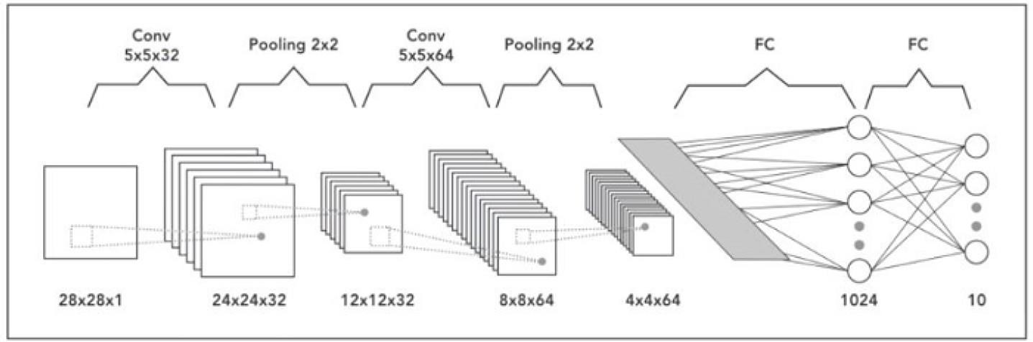

# Problem : Using the first 500 samples in the MNIST data set. Compare the CNN with the above architecture and a suitable ANN of your choice based on metrics like accuracy, f1 score, precision score, and recall score.


# ANN for MNIST data

# Step 1: Data Preparation

In [1]:
from keras.datasets import mnist
import tensorflow as tf

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X = X_train[0:500,]
y = y_train[0:500,]
y.shape

(500,)

In [5]:
X_shape = X.reshape(X.shape[0],784)

In [6]:
X_shape.shape

(500, 784)

# Step 2: Converting the y column to categorical- The target column of the mnist data contains digits 0,1,2,...,9 which are obviously numeric. Hence it is necessary to convert them to categorical.

In [7]:

from sklearn.preprocessing import LabelEncoder
f = LabelEncoder()
y_labels = f.fit_transform(y)


from keras.utils import to_categorical
y = to_categorical(y_labels,num_classes=10)


In [8]:
y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Step 3: Construction of ANN with suitable for MNIST Data

In [9]:
from keras import models,layers

model = models.Sequential()
model.add(layers.Dense(1000,input_dim=784,activation='relu'))
model.add(layers.Dense(2000,activation='elu'))
model.add(layers.Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 2000)              2002000   
                                                                 
 dense_2 (Dense)             (None, 10)                20010     
                                                                 
Total params: 2,807,010
Trainable params: 2,807,010
Non-trainable params: 0
_________________________________________________________________


# Step 4: Compile and Fit the model

In [11]:
model.compile(loss='categorical_crossentropy',metrics='accuracy')

In [12]:
model.fit(X_shape,y,epochs=10)

Epoch 1/10
16/16 [==============================] - 1s 40ms/step - loss: 146.7204 - accuracy: 0.5580
Epoch 2/10
16/16 [==============================] - 1s 38ms/step - loss: 2.5988 - accuracy: 0.8920
Epoch 3/10
16/16 [==============================] - 1s 36ms/step - loss: 1.2757 - accuracy: 0.9460
Epoch 4/10
16/16 [==============================] - 1s 36ms/step - loss: 3.7849 - accuracy: 0.8980
Epoch 5/10
16/16 [==============================] - 1s 34ms/step - loss: 1.2776 - accuracy: 0.9540
Epoch 6/10
16/16 [==============================] - 1s 36ms/step - loss: 3.1072 - accuracy: 0.9320
Epoch 7/10
16/16 [==============================] - 1s 35ms/step - loss: 0.3308 - accuracy: 0.9800
Epoch 8/10
16/16 [==============================] - 1s 34ms/step - loss: 2.6741 - accuracy: 0.9540
Epoch 9/10
16/16 [==============================] - 1s 34ms/step - loss: 2.3875 - accuracy: 0.9480
Epoch 10/10
16/16 [==============================] - 1s 48ms/step - loss: 1.0070 - accuracy: 0.9700


# Step 5: Inline Prediction

In [13]:
X_test = X_test[:25,]
Xtest_shape = X_test.reshape(X_test.shape[0],784)
results = model.predict(Xtest_shape)


1/1 [==============================] - 0s 88ms/step


In [15]:
import numpy as np
pry=np.argmax(results,axis=1)
pry

array([7, 2, 1, 0, 4, 1, 4, 9, 2, 9, 0, 6, 9, 0, 1, 3, 9, 7, 3, 4, 9, 6,
       6, 5, 9])

In [16]:
y_ac = y_test[:25]
y_ac

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4], dtype=uint8)

# Step 6: Computing Precision, recall, f1 score

In [17]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

p_s1=precision_score(y_ac,pry,average="weighted")
r_s1=recall_score(y_ac,pry,average="weighted")
f_s1=f1_score(y_ac,pry,average="weighted")
print("  Precision:  ", np.round(p_s1,4) ,  "Recall:  " ,r_s1 , " f1_score:  " , np.round(f_s1,4))

  Precision:   0.9267 Recall:   0.88  f1_score:   0.8723


# CNN for MNIST data

# Step 7: Construction of CNN suitable for MNIST Data

In [18]:
import tensorflow as tf
from keras.datasets import mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

from keras.models import Sequential
from keras import layers # ANN
from keras.layers import Convolution2D,MaxPooling2D
from keras.layers import Flatten

model = Sequential()
model.add(Convolution2D(filters=32,kernel_size=(5,5),input_shape=(28,28,1),activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(filters=64,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(layers.Dense(10,activation='softmax'))
 
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 10)               

# Step 8: Compile and Fit the model

In [19]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
X = X_train[:500,]
y = y_train[:500,]
X.shape

(500, 28, 28)

In [21]:
from sklearn.preprocessing import LabelEncoder
f = LabelEncoder()
y_labels = f.fit_transform(y)


from keras.utils import to_categorical
y = to_categorical(y_labels,num_classes=10)
y.shape

(500, 10)

In [22]:
X_shape = X.reshape(X.shape[0],28,28,1)
X_shape.shape

(500, 28, 28, 1)

In [23]:
model.fit(X_shape,y,epochs=10)

Epoch 1/10
16/16 [==============================] - 1s 35ms/step - loss: 31.5256 - accuracy: 0.3540
Epoch 2/10
16/16 [==============================] - 1s 35ms/step - loss: 1.2301 - accuracy: 0.7800
Epoch 3/10
16/16 [==============================] - 1s 36ms/step - loss: 0.6131 - accuracy: 0.8800
Epoch 4/10
16/16 [==============================] - 1s 60ms/step - loss: 0.6022 - accuracy: 0.8780
Epoch 5/10
16/16 [==============================] - 1s 61ms/step - loss: 0.8813 - accuracy: 0.8700
Epoch 6/10
16/16 [==============================] - 1s 61ms/step - loss: 0.0460 - accuracy: 0.9860
Epoch 7/10
16/16 [==============================] - 1s 40ms/step - loss: 0.1448 - accuracy: 0.9680
Epoch 8/10
16/16 [==============================] - 1s 34ms/step - loss: 0.3882 - accuracy: 0.9220
Epoch 9/10
16/16 [==============================] - 1s 33ms/step - loss: 0.0813 - accuracy: 0.9680
Epoch 10/10
16/16 [==============================] - 1s 34ms/step - loss: 0.0787 - accuracy: 0.9780


# Step 9: Inline Prediction

In [24]:
X_test = X_test[:25,]
X_test_1 = X_test.reshape(X_test.shape[0],28,28,1)

In [25]:
results = model.predict(X_test_1)
results
import numpy as np
pry1=np.argmax(results,axis=1)
pry1
y_test = y_test[:25,]

1/1 [==============================] - 0s 76ms/step


# Step 10: Computing precision score, f1 score and recall score

In [26]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

p_s1=precision_score(y_test,pry1,average="weighted")
r_s1=recall_score(y_test,pry1,average="weighted")
f_s1=f1_score(y_test,pry1,average="weighted")
print("  Precision:  ", np.round(p_s1,4) ,  "Recall:  " ,r_s1 , " f1_score:  " , np.round(f_s1,4))

  Precision:   0.9267 Recall:   0.88  f1_score:   0.895


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Conclusion

## On training the first 500 images for training and first 25 images for testing using CNN and ANN

In [27]:
import pandas as pd
result_final = pd.DataFrame({'precision_score' : [0.7729,0.872], 'recall_score' : [0.68,0.88], 'f1_score' : [0.6773,0.866]},index=['ANN','CNN'])
result_final

,precision_score,recall_score,f1_score
ANN,0.7729,0.68,0.6773
CNN,0.8720,0.88,0.8660


### Thus, we conclude CNN works good than ANN.